Прежде всего подключаю библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Открытие файла данных и изучение информации

Открываю файл.

In [ ]:
games = pd.read_csv('/datasets/games.csv')

Кратко ознакомлюсь с содержимым.

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, что бросается в глаза прежде всего.
 - Тип данных в колонке "Год выпуска" - число с плавающей точкой. Нелогично. Должно быть целое число.
 - Тип данных в колонке "Оценка пользователей". По крайней мере, должно быть вещественное число, но никак не текст.
 - Всего 16715 строк. Следовательно, легко видно, что в ряде столбцов есть пропуски.
 Посчитаем их.

In [ ]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Дополнительно выведу процентное содержание пропусков по столбцам.

In [ ]:
games.isna().mean()*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

- 2 пропуска в колоне "Название";
- 269 пропусков в колонке "Год выпуска";
- 2 пропуска в колонке "Жанр";
- 8578 пропусков в колонке "Оценка критиков";
- 6701 пропуск в колонке "Оценка пользователей";
- 6766 пропусков в колонке "Рейтинг".
Есть, с чем поработать, что поправить.

Перед тем, как приступить к предобработке данных, посмотрю на первые несколько строк файла.

In [ ]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Открыли файл, ознакомились с содержимым, увидели наличие пропусков и нелогичных типов данных. Переходим к предобработке.

#### Подготовка (предобработка) данных

##### Приведение названий столбцов к нижнему регистру

In [ ]:
games.columns = games.columns.str.lower()

Проверяю, что получилось.

In [ ]:
games.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сокращать или менять названия столбцов не вижу смысла. Оставляю как есть.

##### Преобразование типов данных

Прежде всего, сделаю "Год выпуска" целочисленным. Потому что год, всё-таки, дробью быть не может. Но, не забываем о 269 пропусках. Почему их не заполнили? Неаккуратность, возможно. Удалять строки с пропусками не буду. По крайней мере пока. Заменю их нулями.

In [ ]:
games['year_of_release'] = games['year_of_release'].fillna(0)

Теперь меняю тип данных. С подстраховкой.

In [ ]:
try:
    games['year_of_release'] = games['year_of_release'].astype('int')
    print('Всё получилось')
except:
    print('К сожалению, преобразование не удалось')

Всё получилось


Дальше. Оценка критиков. Тип вещественный, но по первым 15 строкам его необходимость неочевидна. Посмотрю на значения целиком.

In [ ]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Дробных значений рейтинга нет (да и нужны ли дроби при 100-бальной шкале). Поэтому смело преобразую в целочисленный тип.

In [ ]:
try:
    games['critic_score'] = games['critic_score'].astype('Int64')
    print('Всё получилось')
except:
    print('К сожалению, преобразование не удалось')

Всё получилось


Тип Int64 выбрал, потому что в тип int не преобразовывались данные

Взгляну на таблицу. Для самопроверки. Убедиться, что преобразование данных в двух столбцах состоялось.

In [ ]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


Столбец "Оценка пользователей". Необходимо привести к вещественному типу данных, но, по какой-то причине стоит текстовый формат. Проверяю.

In [ ]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD... Я так полагаю, что это значит to be determined. Значит, рейтинг будет определён. А пока, пусть будет nan.

In [ ]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

Теперь меняю тип на вещественный

In [ ]:
try:
    games['user_score'] = games['user_score'].astype('float64')
    print('Всё получилось')
except:
    print('К сожалению, преобразование не удалось')

Всё получилось


Взглянем на информацию по файлу. Интересует типы данных в столбцах.

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Год - целочисленный тип, оценка критиков - целочисленный тип, оценка пользователей - вещественный. Желаемое достигнуто. Движемся дальше.

##### Обработка пропусков

Двигаюсь по очереди. Начинаю со столбца "Название".

In [ ]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Ни названия, ни жанра, ни оценок и рейтингов. Думаю, что удаление двух строчек на наш анализ никак не повлияет.

In [ ]:
games = games.dropna(subset = ['name'])

Получается, что устранены пропуски и в столбце "Жанр", в нём тоже было 2 пропуска. Поэтому переходим к "Оценке критиков".

In [ ]:
games['critic_score'].isna().sum()

8576

In [ ]:
games['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

"Оценка пользователей" и "Рейтинг".

In [ ]:
games['user_score'].isna().sum()


9123

In [ ]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
games['rating'].isna().sum()

6764

In [ ]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Чем могут быть вызваны пропуски в стобце рейтингов? Например тем, что игра вышла недавно, и статистика ещё не накопилась. Оснований для удаления пропусков или их замещения каким-то значением нет. Поэтому, оставлю как есть.

##### Подсчёт суммарных продаж

Добавлю столбец с суммой продаж по всем регионам.

In [ ]:
games['sum_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-info">
<b>Комментарий студента: 1
</b> Благодарю. Так симпатичнее даже смотрится. Заменил. </div>

In [ ]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


**Выводы по блоку № 2**
На этапе подготовки данных сделано следующее:
1. Названия столбцов приведены к нижнему регистру;
2. Данные в столбцах "Год выпуска" и "Оценка критиков" приведены к целочисленному типу данных;
3. Данные в столбце "Оценка пользователй" приведена к вещественному типу данных. Предварительно тестовое значение одной из ячеек заменено обычным nan;
4. Удалены строки с пропущенными значениями в столбцах "Год выпуска" и "Жанр" (это одни и те же строки);
5. Пропущенные значения в столбцах "Оценка критиков", "Оценка пользователей" и "Жанр" оставлены без изменений. Сделано предположение, что проуски соответствуют надавно вышедшим играм и статистика по оценкам ещё не успела накопиться.

Переходим к исследовательскому анализу.

#### Исследовательский анализ данных

##### Проверка количества игр, выпущенных в каждый год

In [ ]:
games['year_of_release'].describe()

count    16713.000000
mean      1974.191348
std        252.574959
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [ ]:
games[games['year_of_release'] > 1900].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Забыл, что в данных по годам есть 269 нулей. Итак, общий период продаж игр 1980-2016.

Разделю на 4 периода по 9 лет.

Text(0.5, 0, 'Год')

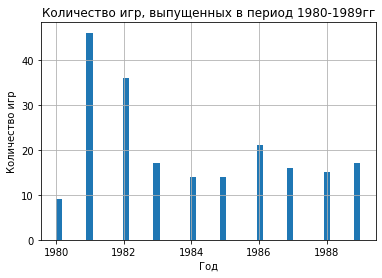

In [ ]:
games['year_of_release'].hist(bins=50, range=(1980, 1989))
plt.title("Количество игр, выпущенных в период 1980-1989гг")
plt.ylabel("Количество игр")
plt.xlabel("Год")

Text(0.5, 0, 'Год')

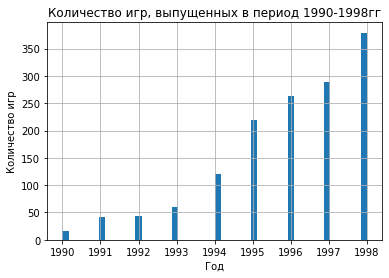

In [ ]:
games['year_of_release'].hist(bins=50, range=(1990, 1998))
plt.title("Количество игр, выпущенных в период 1990-1998гг")
plt.ylabel("Количество игр")
plt.xlabel("Год")

Text(0.5, 0, 'Год')

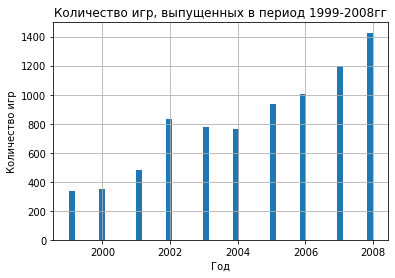

In [ ]:
games['year_of_release'].hist(bins=50, range=(1999, 2008))
plt.title("Количество игр, выпущенных в период 1999-2008гг")
plt.ylabel("Количество игр")
plt.xlabel("Год")

Text(0.5, 0, 'Год')

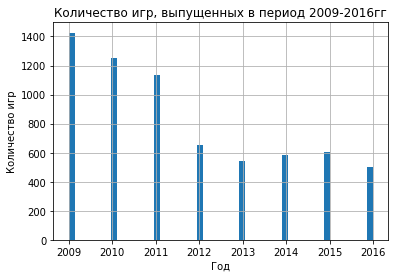

In [ ]:
games['year_of_release'].hist(bins=50, range=(2009, 2016))
plt.title("Количество игр, выпущенных в период 2009-2016гг")
plt.ylabel("Количество игр")
plt.xlabel("Год")

С 2006 по 2011 год ежегодно выпускалось более 1000 игр!!! Самый значимый период!

Добавлю график за весь период, чтобы увидеть общую картину.

Text(0.5, 0, 'Год')

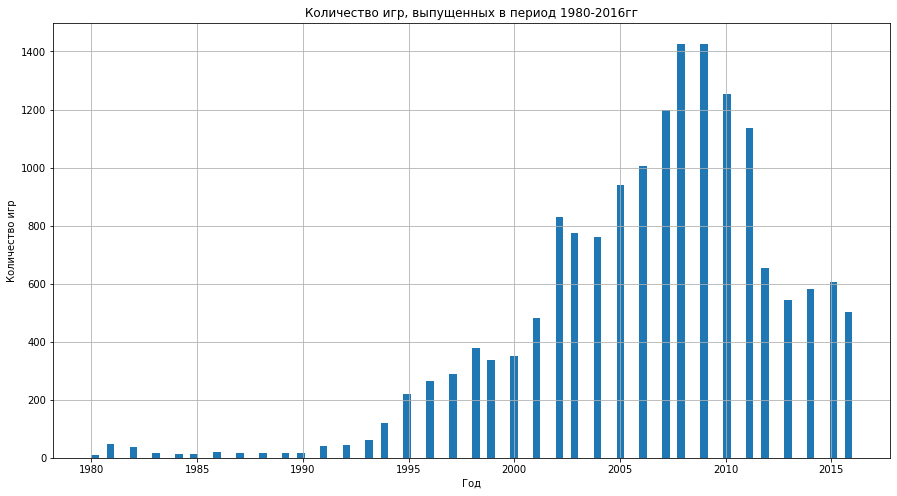

In [ ]:
games['year_of_release'].hist(bins=100, range=(1980, 2016), figsize = (15,8))
plt.title("Количество игр, выпущенных в период 1980-2016гг")
plt.ylabel("Количество игр")
plt.xlabel("Год")

##### Проверка продаж по платформам

Сначала сформирую сводную таблицу с суммарными продажами по платформам и отсортирую по убыванию.

In [ ]:
platform_rating = games.pivot_table(index = 'platform',
                                    values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

Выведу результат на экран.

In [ ]:
platform_rating

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


По моему мнению, ярко смотрятся 6 платформ, но, наверное, маловато. Возьму 9, с количеством продаж более 290 млн копий. Жаль, что топ не попадает моя любимая Sega (Genesis).

Проведу некоторые манипуляции с файлом platform_rating, чтобы отсечь самые "продаваемые" платформы.

In [ ]:
top_9_platforms=platform_rating.reset_index()

In [ ]:
top_9 = top_9_platforms.iloc[:9]
top_9_platforms = top_9['platform'].unique()

Text(0.5, 0, 'Количество продаж, млн. копий')

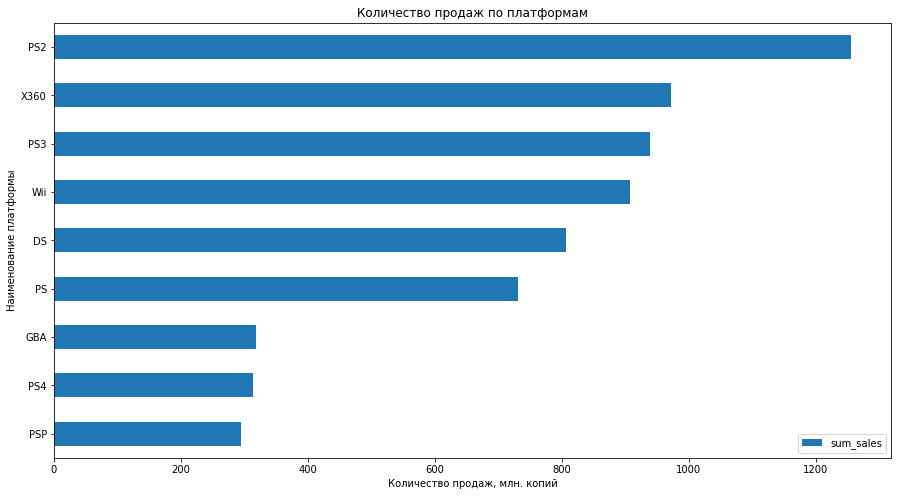

In [ ]:
top_9.sort_values(by='sum_sales', ascending=True).plot(x='platform', y='sum_sales',kind='barh', figsize = (15,8))
plt.title("Количество продаж по платформам")
plt.ylabel("Наименование платформы")
plt.xlabel("Количество продаж, млн. копий")

Наглядное представление в виде графика получил. Теперь выведем на графике динамику продаж каждой из топовых платформ по годам.

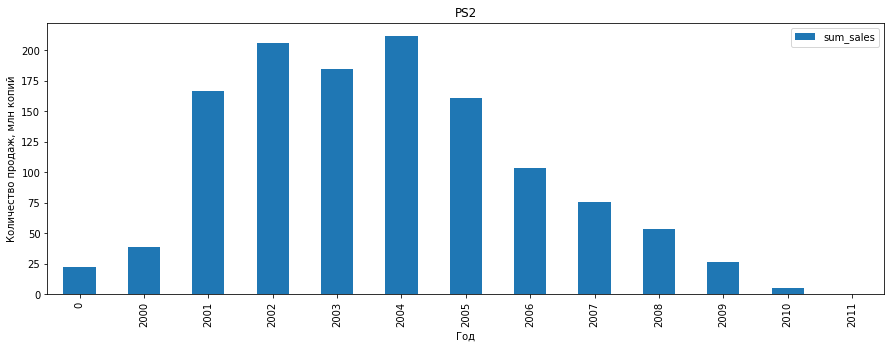

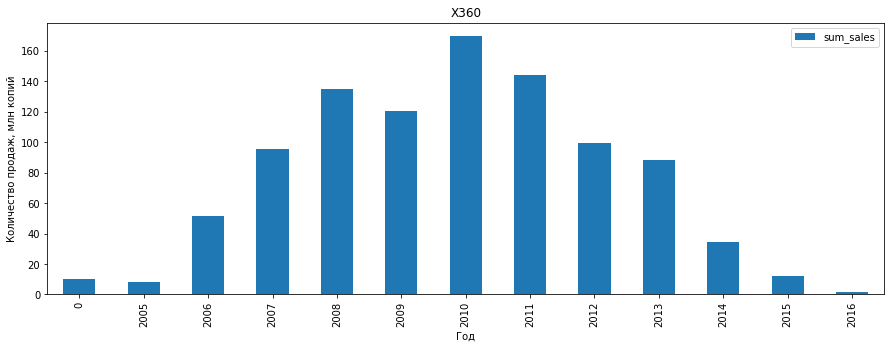

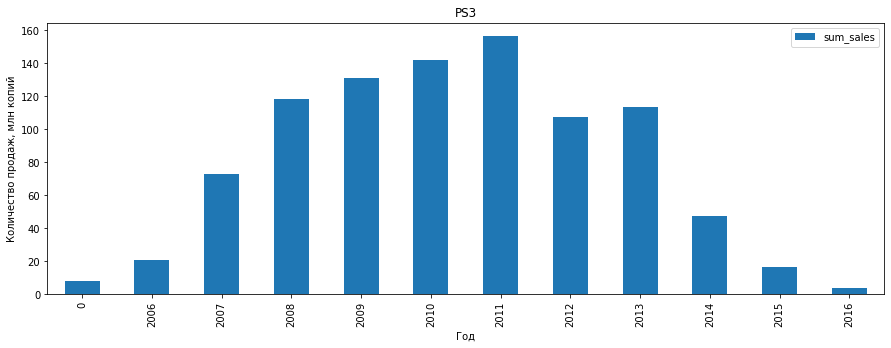

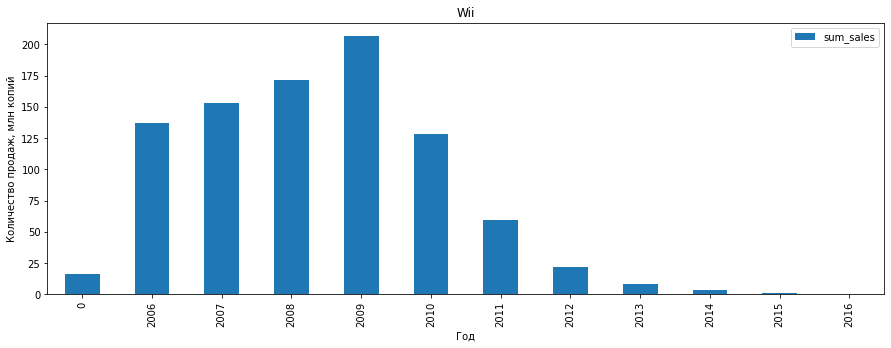

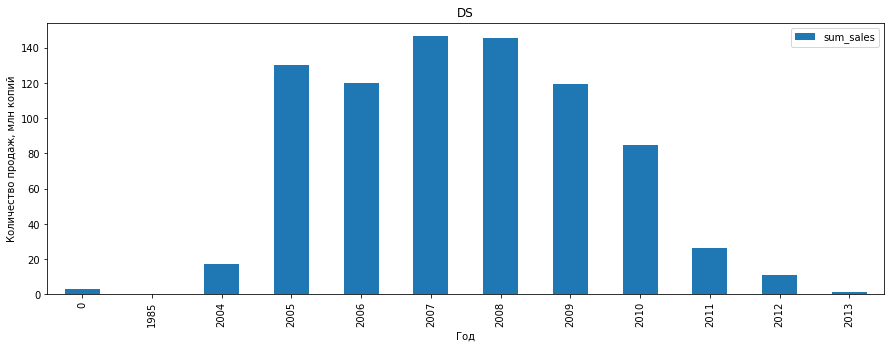

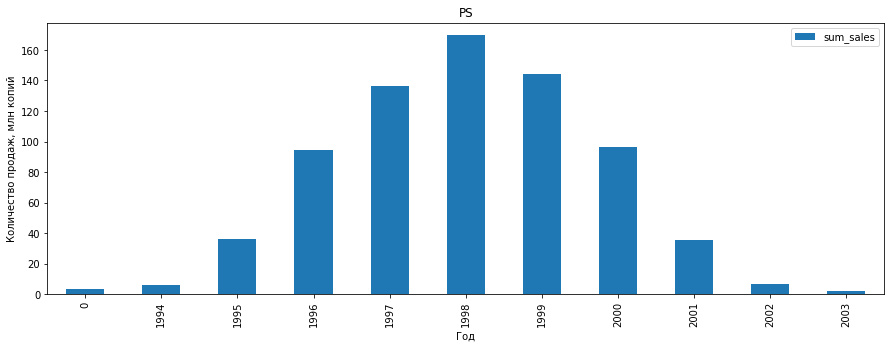

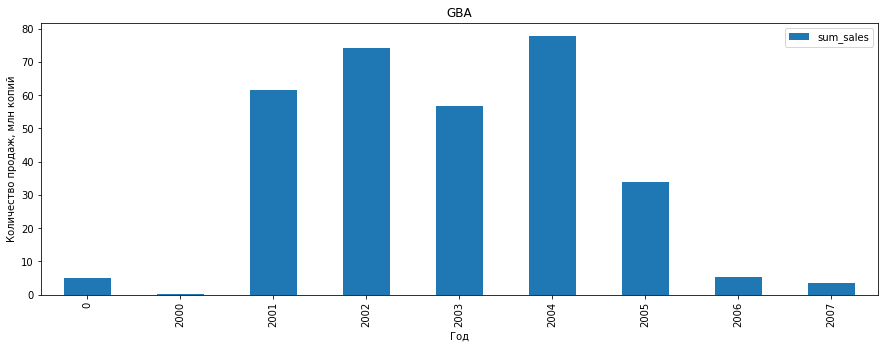

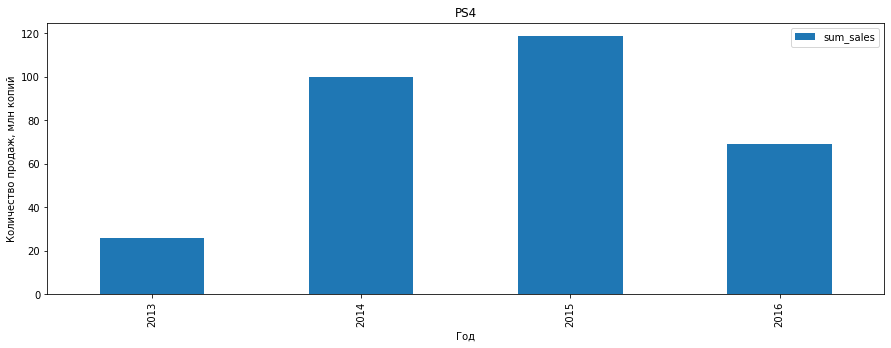

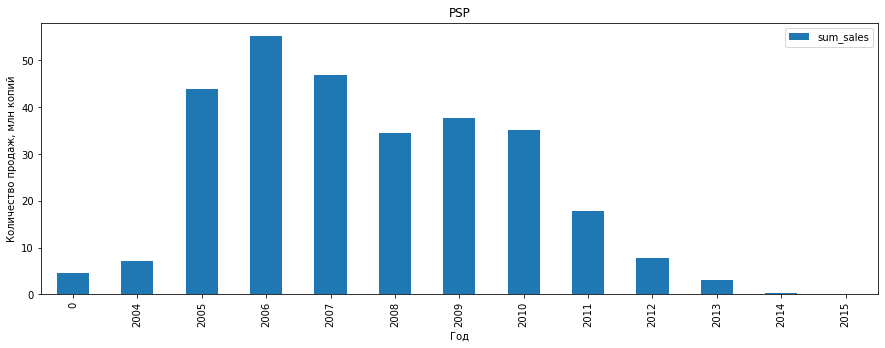

In [ ]:
for platform in top_9_platforms:
    games[games['platform'] == platform].pivot_table(index = 'year_of_release',
                                                     values = 'sum_sales', aggfunc = 'sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)
    plt.ylabel('Количество продаж, млн копий')
    plt.xlabel('Год')

Есть нулевые значения по каждой платформе - это те самые, из 269 "нулей" в столбце "год выпуска". По каждой из платформ можно сказать, что "срок жизни" её составляет 10-11 лет. От появления, через взлёт продаж, до потери интереса к платформе. Возможно, это связано с появлением всё новых платформ. По PS4 пока недостаточно статистики - она появилась относительно недавно.

##### Прогноз по продажам на 2017 год

Чтобы сделать прогноз по продажам на 2017 год, нужно взять период, соприкасающийся с этим годом. Возьмём с 2007 по 2016 - 10 лет. Соответственно, данные выберем именно для данного периода.

In [ ]:
forecast_period = games.query('year_of_release>=2007')

Теперь сделаю срез по уже полученному срезу. Посмотрю данные по продажам за указанный период из моей топ-9.

Text(0.5, 0, 'Год')

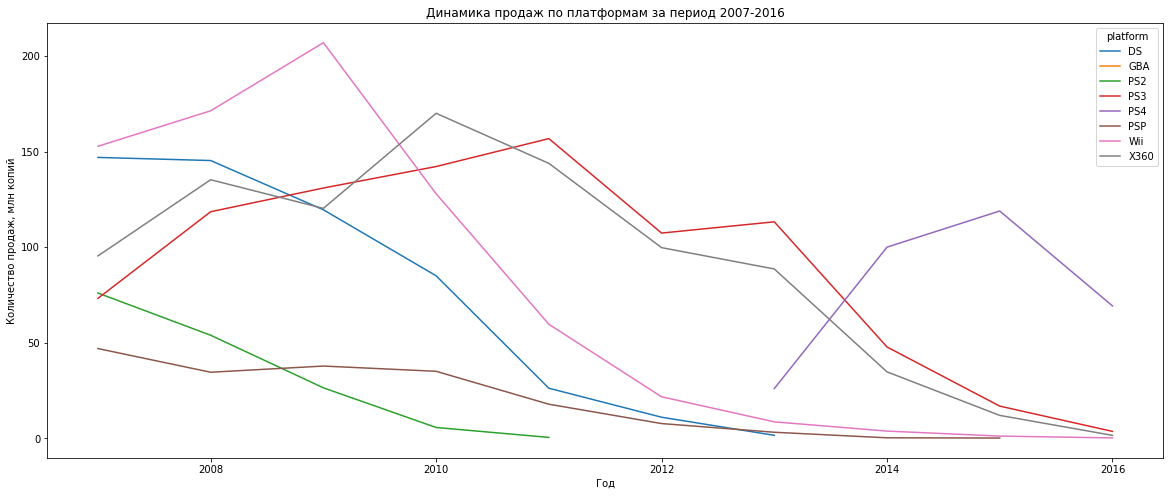

In [ ]:
forecast_period.query('platform in @top_9_platforms').pivot_table(index = 'year_of_release',
                                                columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(figsize=(20,8))
plt.title('Динамика продаж по платформам за период 2007-2016')
plt.ylabel('Количество продаж, млн копий')
plt.xlabel('Год')

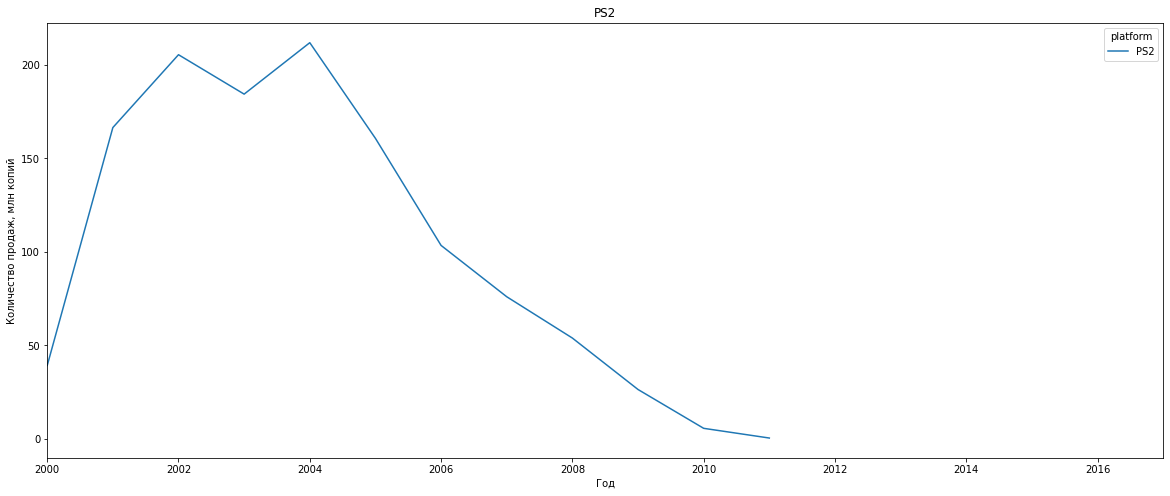

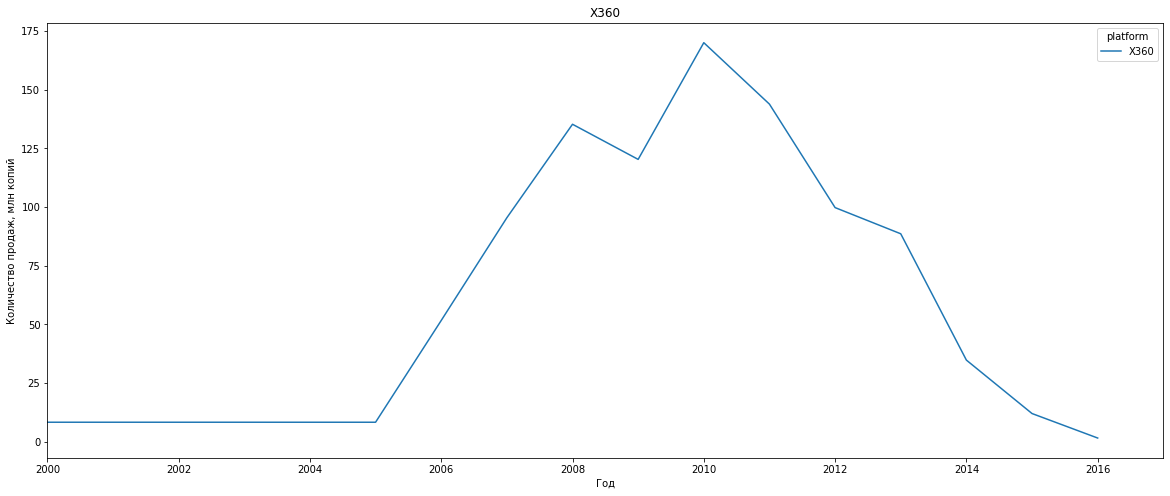

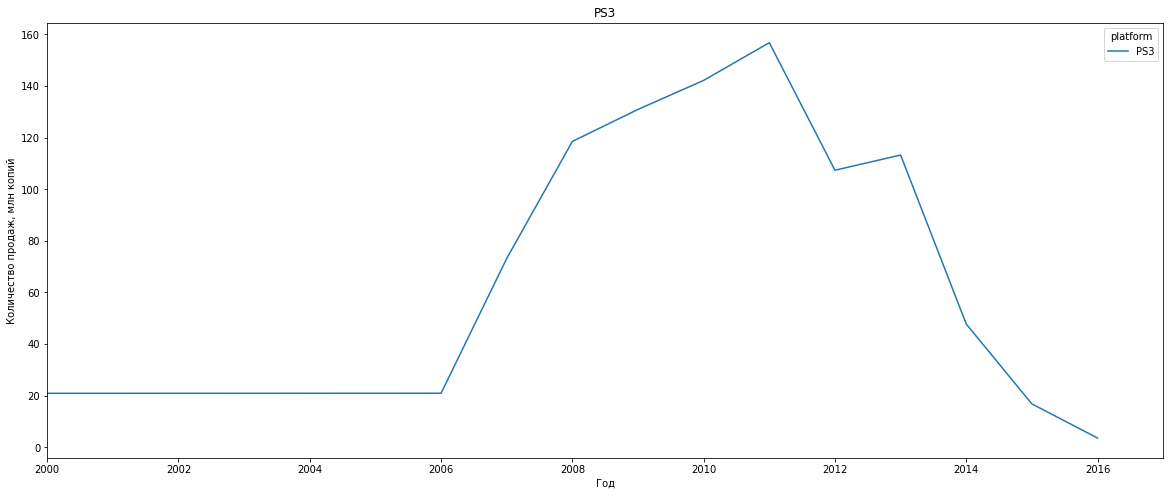

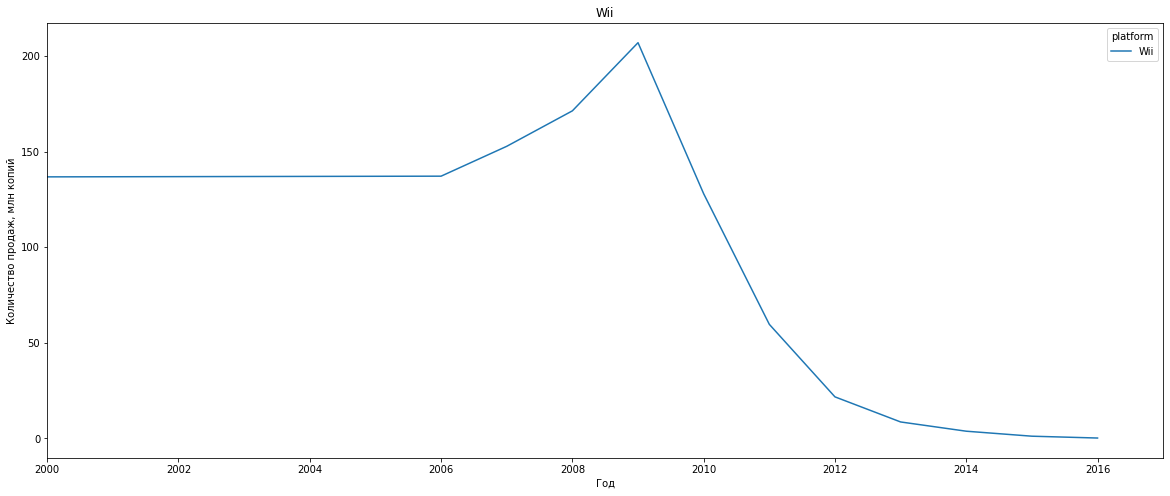

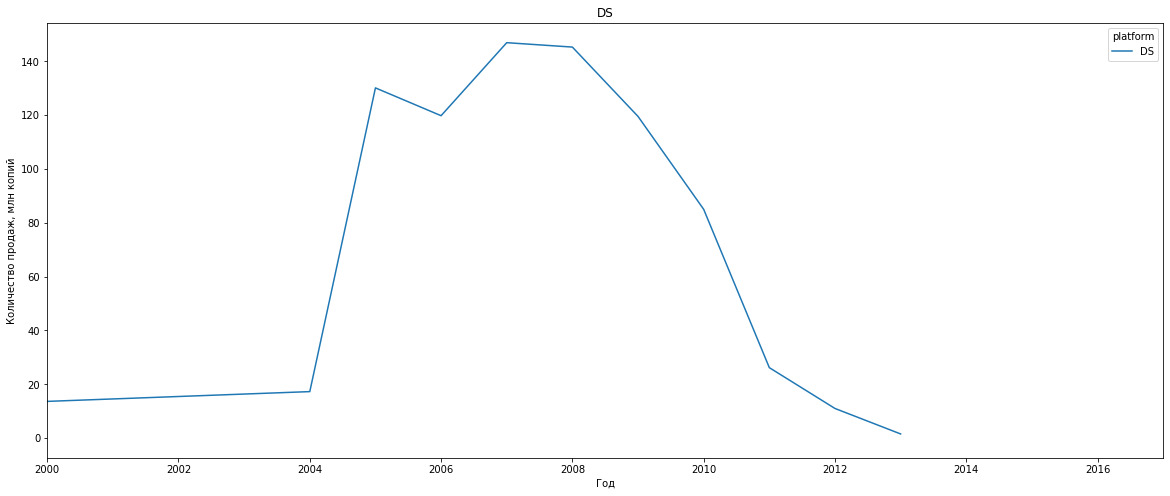

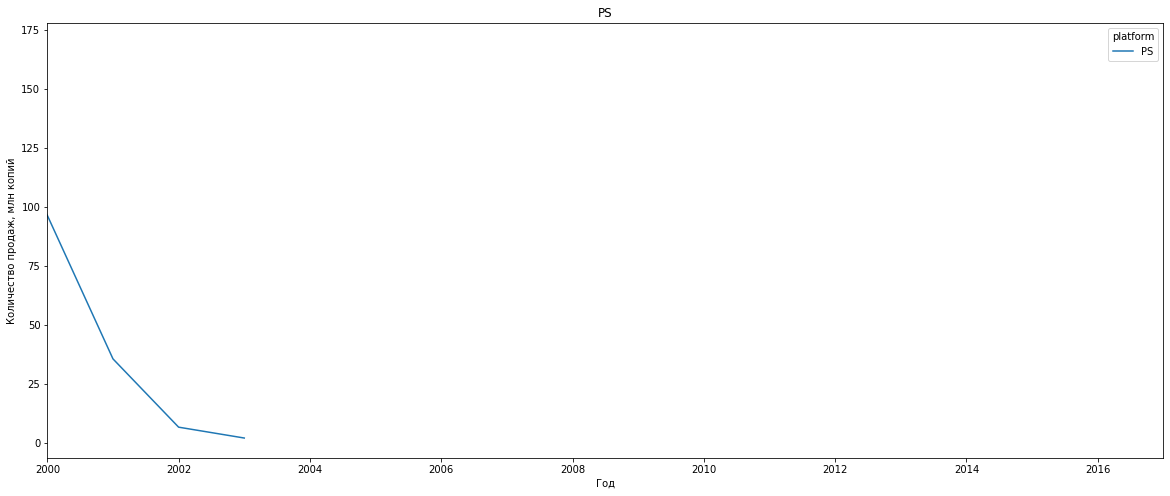

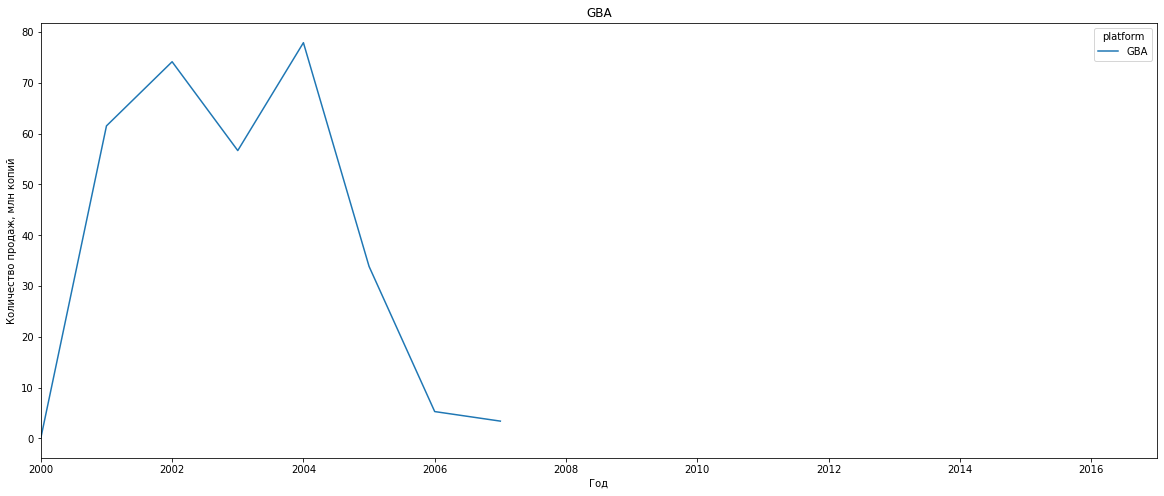

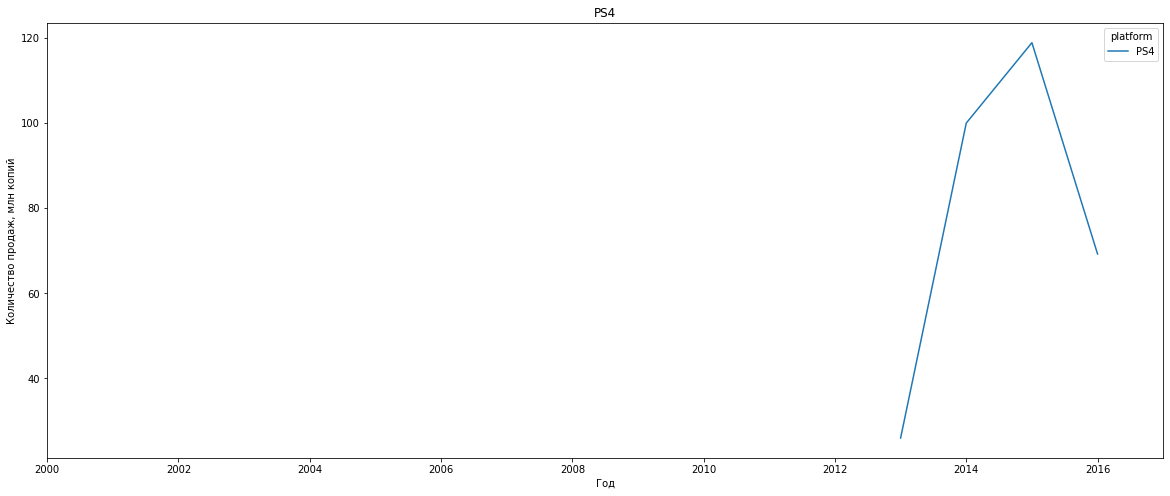

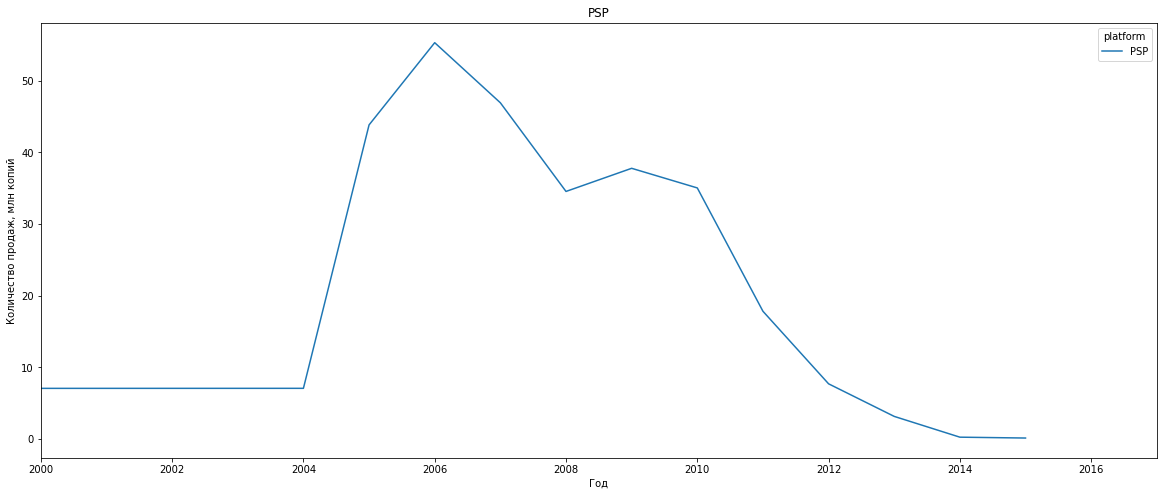

In [ ]:
for platform in top_9_platforms:
    games[games['platform'] == platform].pivot_table(index = 'year_of_release',
                                                     columns = 'platform',
                                                     values = 'sum_sales', aggfunc = 'sum').plot(figsize=(20,8),
                                                                                                 xlim = (2000, 2017))
    plt.title(platform)
    plt.ylabel('Количество продаж, млн копий')
    plt.xlabel('Год')

За исключением PS4, которая вышла недавно, по остальным платформам видим снижение продаж. За рассматриваемый период наибольшего пика достигала платформа Wii, но в динамике лучше выглядет PS3 - более стабильные продажи. Сейчас же все платформы, кроме Ps4 стремяься к нулю продаж. Итак, видим, что будущее по данному прогнозу есть только у PS4 - новая иновая консоль, её "жизненный цикл" ещё до половины не дошёл. Ещё будут продаваться PS3 и Xbox, правда уже на грани.

Text(0.5, 0, 'Год')

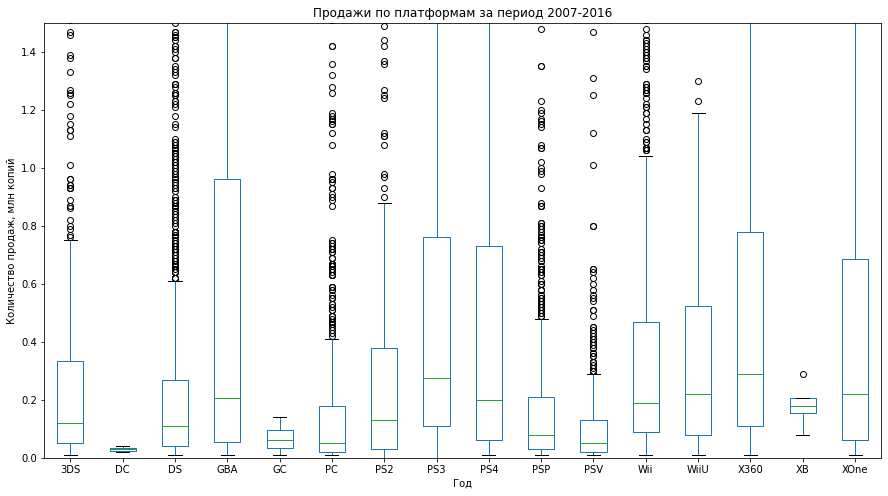

In [ ]:
forecast_period.pivot_table(index='name', columns = 'platform',
                            values = 'sum_sales', aggfunc = 'sum').plot(kind = 'box', ylim = (0, 1.5), figsize = (15,8))
plt.title('Продажи по платформам за период 2007-2016')
plt.ylabel('Количество продаж, млн копий')
plt.xlabel('Год')

- Интересно, что практически для всех платформ медиана находится не выше 0,3 млн продаж. А если взять лидера - PS2 - его третий квартиль, то есть отсечка 75% значений, находится на уровне 0,4 млн. Получается, что основную массу продаж обеспечивают некие конкретные игры, которые являются культовыми для конкретной платформы.
- По нашей "молодой" платформе из рейтинга - PS4 медиана около 0,2, как и для Wii, Xone, да и X360 не очень далеко ушла. Возможно, если бы я расширил диапазон топовых платформ, Xone встала бы рядом с PS4 как перспективная платформа.

##### Зависимость продаж от пользователей

Рассматривать буду платформу, жизненный цикл которой не затрагивает 2016 год, так год ещё не закнчился (на дворе декабрь по условию) и данные будут неполными.

Возьму нашего лидера - PS2.

In [ ]:
ps2 = forecast_period.query('platform == "PS2"')

Сначала построю диаграмму рассеяния между оценкой пользователей и общими продажами.

Text(0.5, 0, 'Оценка пользователей')

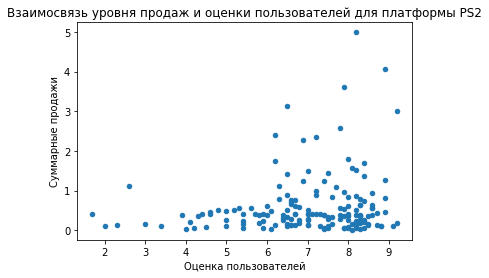

In [ ]:
ps2.plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь уровня продаж и оценки пользователей для платформы PS2')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка пользователей')

Теперь между отзывами критиков и продажами.

Text(0.5, 0, 'Оценка критиков')

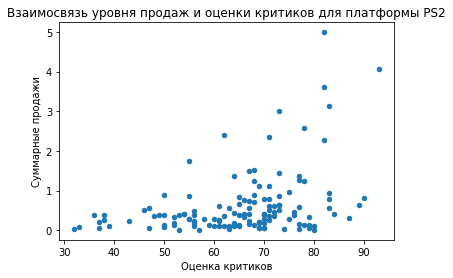

In [ ]:
ps2.plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь уровня продаж и оценки критиков для платформы PS2')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')

И ещё рассмотрю взаимосвязь между отзывами критиков и пользователей. Кто знает...

Text(0.5, 0, 'Оценка пользователей')

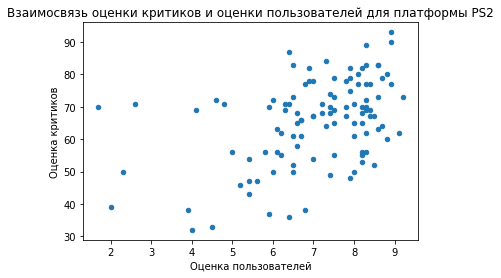

In [ ]:
ps2.plot(x='user_score', y='critic_score', kind='scatter')
plt.title('Взаимосвязь оценки критиков и оценки пользователей для платформы PS2')
plt.ylabel('Оценка критиков')
plt.xlabel('Оценка пользователей')


In [ ]:
ps2_correl = ps2[['critic_score','user_score', 'sum_sales']]
ps2_correl.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.444692,0.377866
user_score,0.444692,1.000000,0.165465
sum_sales,0.377866,0.165465,1.000000


Что же можно сказать. Корреляции между отзывами критиков и пользователей практически нет, точнее очень слабая. Отзывы критиков для PS2 оказывают большее влияние на продажи, нежели отзывы пользователей. Можно рассмотреть парочку других платформ.

In [ ]:
ds = forecast_period.query('platform == "DS"')
psp = forecast_period.query('platform == "PSP"')
ps4 = forecast_period.query('platform == "PS4"')

Text(0.5, 0, 'Оценка пользователей')

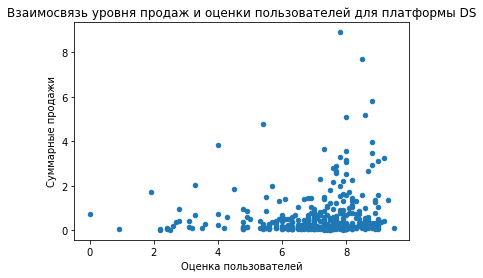

In [ ]:
ds.plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь уровня продаж и оценки пользователей для платформы DS')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка пользователей')

Text(0.5, 0, 'Оценка критиков')

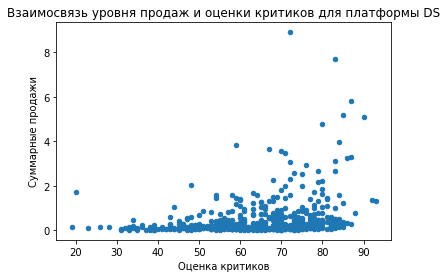

In [ ]:
ds.plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Взаимосвязь уровня продаж и оценки критиков для платформы DS')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')

Text(0.5, 0, 'Оценка пользователей')

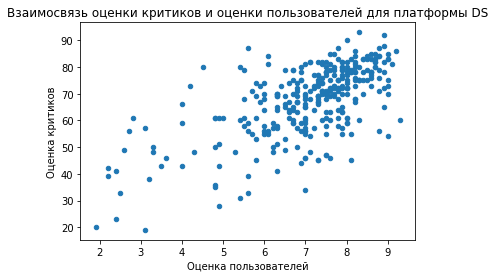

In [ ]:
ds.plot(x='user_score', y='critic_score', kind='scatter')
plt.title('Взаимосвязь оценки критиков и оценки пользователей для платформы DS')
plt.ylabel('Оценка критиков')
plt.xlabel('Оценка пользователей')

Интересно. Отзывы критиков и пользователей ведут себя более согласованно для данной платформы.

In [ ]:
ds_correl = ds[['critic_score','user_score', 'sum_sales']]
ds_correl.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.640615,0.277926
user_score,0.640615,1.000000,0.141829
sum_sales,0.277926,0.141829,1.000000


Но на продажу влияют всё же низко. Здесь тоже разница между влиянием отзывов критиков и отзывов пользователей около 2 раз (чуть меньше), то есть отзывы критиков большее влияние оказывают. Но корреляция между отзывами критиков и пользователей определённо выше, чем для PS2.

Для платформ PSP и PS4 ограничусь табличками.

In [ ]:
psp_correl = psp[['critic_score','user_score', 'sum_sales']]
psp_correl.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.543622,0.321015
user_score,0.543622,1.000000,0.243324
sum_sales,0.321015,0.243324,1.000000


Отзывы критиков и пользователей оказывают близкое влияние на продажи, но, по-прежнему, не очень высокое.

In [ ]:
ps4_correl = ps4[['critic_score','user_score', 'sum_sales']]
ps4_correl.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sum_sales,0.406568,-0.031957,1.000000


Здесь влияние отзывов критиков и отсутствие влияния отзывов пользователей.

##### Распределение игр по жанрам

Text(0.5, 1.0, 'Распределение продаж игр по жанрам')

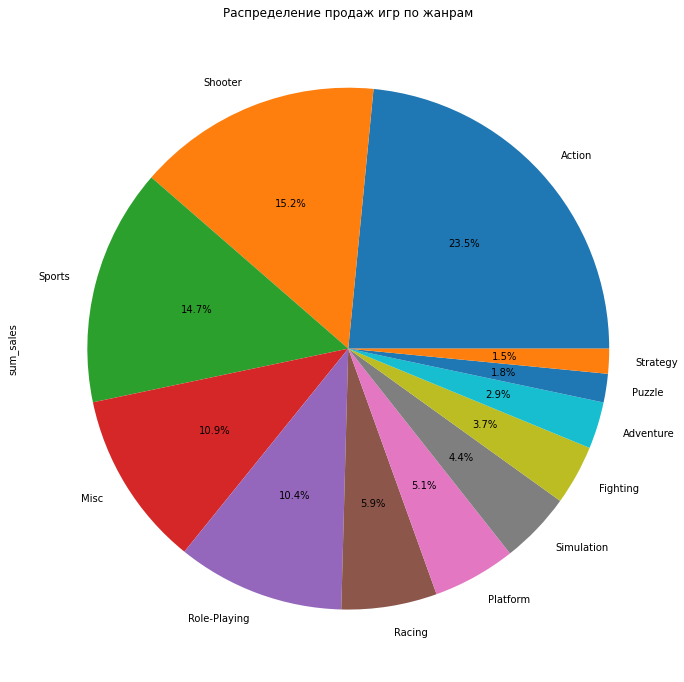

In [ ]:
forecast_period.pivot_table(index = 'genre', values = 'sum_sales',
                        aggfunc = 'sum').sort_values(ascending=False,
                                                     by = 'sum_sales').plot(kind='pie', autopct = '%1.1f%%',
                                                                            figsize=(12,12), y= 'sum_sales', legend=False)
plt.title('Распределение продаж игр по жанрам')

Наибольшую долю продаж забирает Экшн, второе и третье место с близкими показателями Стрелялки и Спорт соответственно. Аутсайдеры - Паззлы и Стратегии.

Теперь посмотрим на абсолютные значения продаж.

In [ ]:
forecast_period.pivot_table(index = 'genre',
                            values = 'sum_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'sum_sales')

,sum_sales
genre,
Action,1050.59
Shooter,678.80
Sports,658.07
Misc,487.89
Role-Playing,465.03
Racing,265.19
Platform,230.45
Simulation,199.13
Fighting,166.00


Выводы по количественным данным, само собой, совпадают с выводами по качественным данным. Экшн и Стрелялки - лидеры, Паззлы и Стратегии - аутсайдеры.

Кроме того, выведу картину для средних значений, как для величины, более устойчивой к выбросам.

Text(0.5, 1.0, 'Распределение средних значений продаж игр по жанрам')

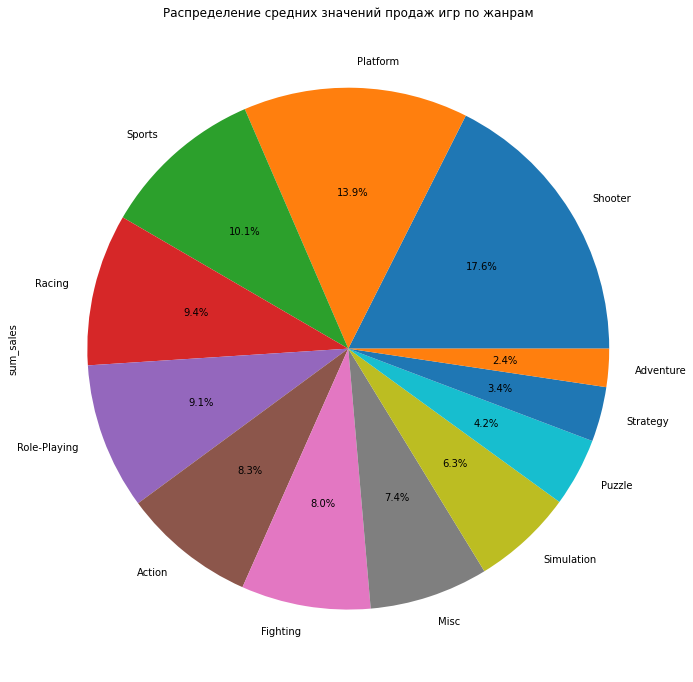

In [ ]:
forecast_period.pivot_table(index = 'genre', values = 'sum_sales',
                        aggfunc = 'mean').sort_values(ascending=False,
                                                     by = 'sum_sales').plot(kind='pie', autopct = '%1.1f%%',
                                                                            figsize=(12,12), y= 'sum_sales', legend=False)
plt.title('Распределение средних значений продаж игр по жанрам')

In [ ]:
forecast_period.pivot_table(index = 'genre',
                            values = 'sum_sales', aggfunc = 'mean').sort_values(ascending=False, by = 'sum_sales')

,sum_sales
genre,
Shooter,1.016168
Platform,0.805769
Sports,0.585472
Racing,0.544538
Role-Playing,0.524865
Action,0.477975
Fighting,0.463687
Misc,0.426105
Simulation,0.362714


Получаем другую картину. Лидерами по среднему числу продаж являются Шутеры, Платформеры, Спортивные игры. Аутсайдеры - Паззлы, Стратегии и Приключения.

**Выводы по блоку 3.** По результатам исследовательского анализа данных можно сделать следующие выводы:
1. В период 1980-2016 самым значимым периодом является 2006-2011 гг. В данный промежуток времени ежегодно выпускалось более 1000 игр;
2. Наиболее популярной платформой по продажам является PS2. В топ9 так же входят X360, PS3, Wii, DS, PS, GBA, PS4 и	PSP;
3. Период от появления платформы до практически полного преращения продаж составляет около 10 лет;
4. По прогнозу на 2017 год наиболее продаваемыми будут платформы PS4, PS3 и Xbox;
5. Медианные значения продаж по всем платформам лежат в пределах 0,4 млн, 3/4 продаж по всем платформам составляют менее 1 млн. Большой вклад в итоговые продажи вносят уникальные, культовые для конкретных платформ игры.
6. Проверка корреляции между отзывами критиков/пользователей и продажи показывает большее влияние отзывов критиков на выбор покупателей;
7. Самыми популярными жанрами игр (по общему числу продаж) являются Action, Shooter и Sports, наименее популярными - Puzzle и Strategy;
8. Самыми популярными жанрами игр (по среднему числу продаж) являются Shooter, Platform и Sports, наименее популярными - Strategy и Adventure.

#### Составление портрета пользователя для каждого региона продаж

В данном пункте предстоит определить:
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### Самые популярные игровые платформы по регионам

Начнём с Северной Америки.

Text(0.5, 0, 'Количество продаж')

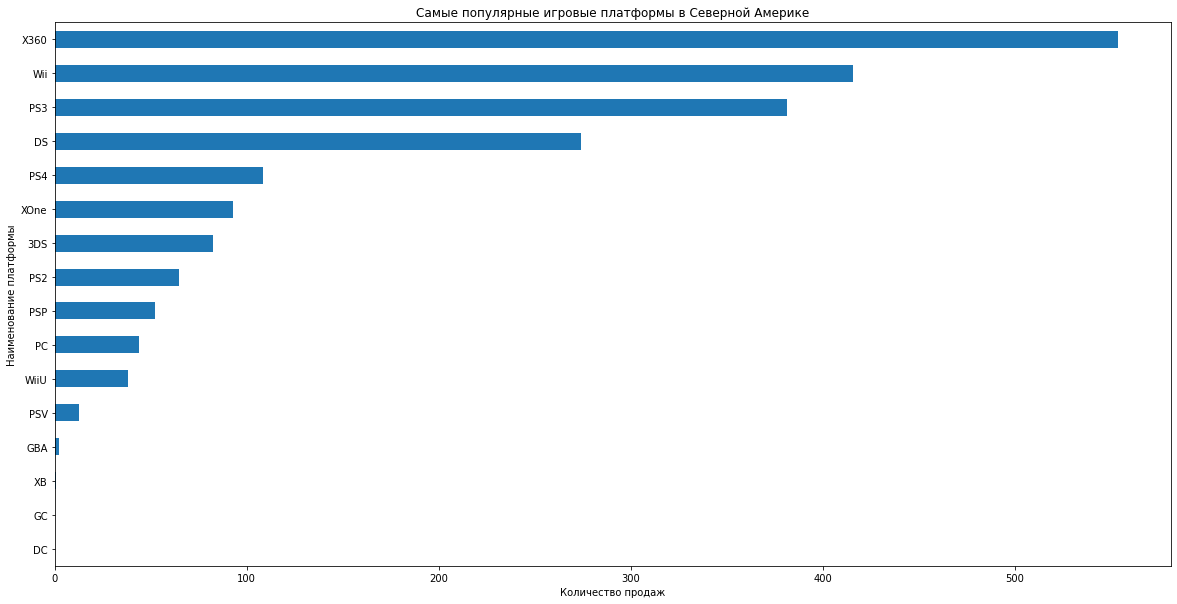

In [ ]:
forecast_period.pivot_table(index = 'platform',
                            values = 'na_sales', aggfunc = 'sum').sort_values(ascending=True,
                                                                              by = 'na_sales').plot(kind = 'barh',
                                                                                                    figsize=(20,10),
                                                                                                    legend = False)
plt.title('Самые популярные игровые платформы в Северной Америке')
plt.ylabel('Наименование платформы')
plt.xlabel('Количество продаж')

На 1 месте патриотично находится Х360 от Майкрософт, следующие 4 места у "японцев" от Нинтендо и Сони. Со временем, вероятно, Хone потеснит конкурентов. В Северной Америке лидер - американец, что логично. Японские производители берут своей многочисленностью и разнообразием.

Переходим к Старому Свету.

Text(0.5, 0, 'Количество продаж')

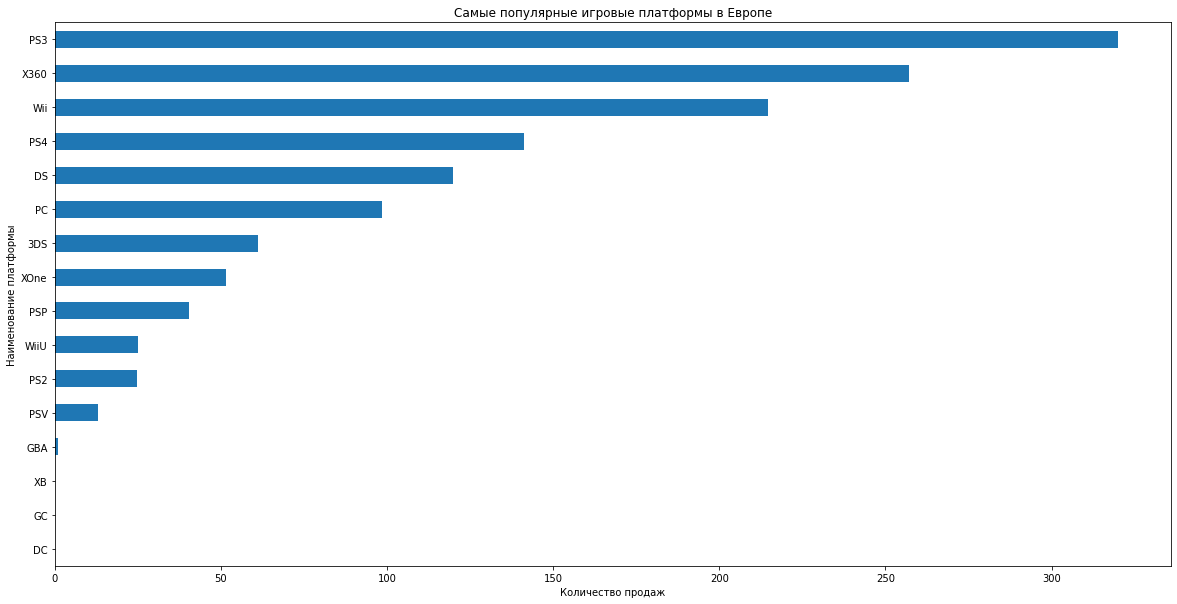

In [ ]:
forecast_period.pivot_table(index = 'platform',
                            values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=True,
                                                                              by = 'eu_sales').plot(kind = 'barh',
                                                                                                    figsize=(20,10),
                                                                                                    legend = False)
plt.title('Самые популярные игровые платформы в Европе')
plt.ylabel('Наименование платформы')
plt.xlabel('Количество продаж')

Первая пятёрка та же, что и в Северной Америке, только лидер PS3. Популярны как японские, так и американские приставки.

Теперь узнаем, какие предпочтения у японских игроков.

Text(0.5, 0, 'Количество продаж')

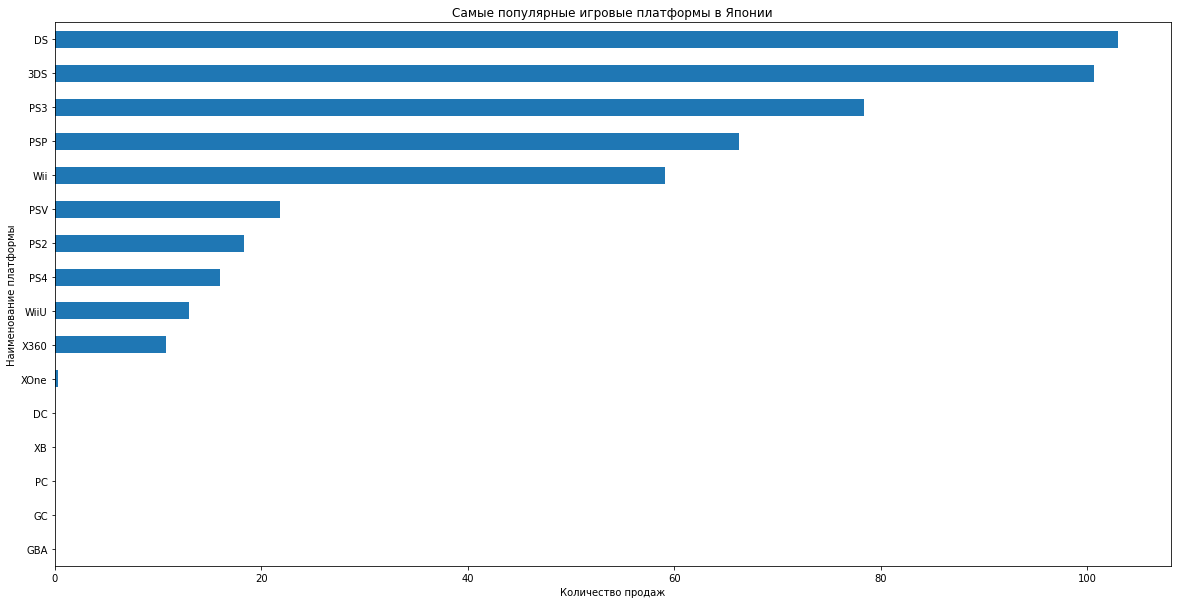

In [ ]:
forecast_period.pivot_table(index = 'platform',
                            values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=True,
                                                                              by = 'jp_sales').plot(kind = 'barh',
                                                                                                    figsize=(20,10),
                                                                                                    legend = False)
plt.title('Самые популярные игровые платформы в Японии')
plt.ylabel('Наименование платформы')
plt.xlabel('Количество продаж')

Абсолютное преимущество отечественного производителя. Не то, что первая пятёрка, первые 9 позиций у японских приставок! Что интересно, наиболее популярны портативные игровые системы, то есть японские игроки предпочитают, вероятно, играть находу, а не сидя дома или в игровых клубах.

Ради интереса посмотрю на остальные регионы.

Text(0.5, 0, 'Количество продаж')

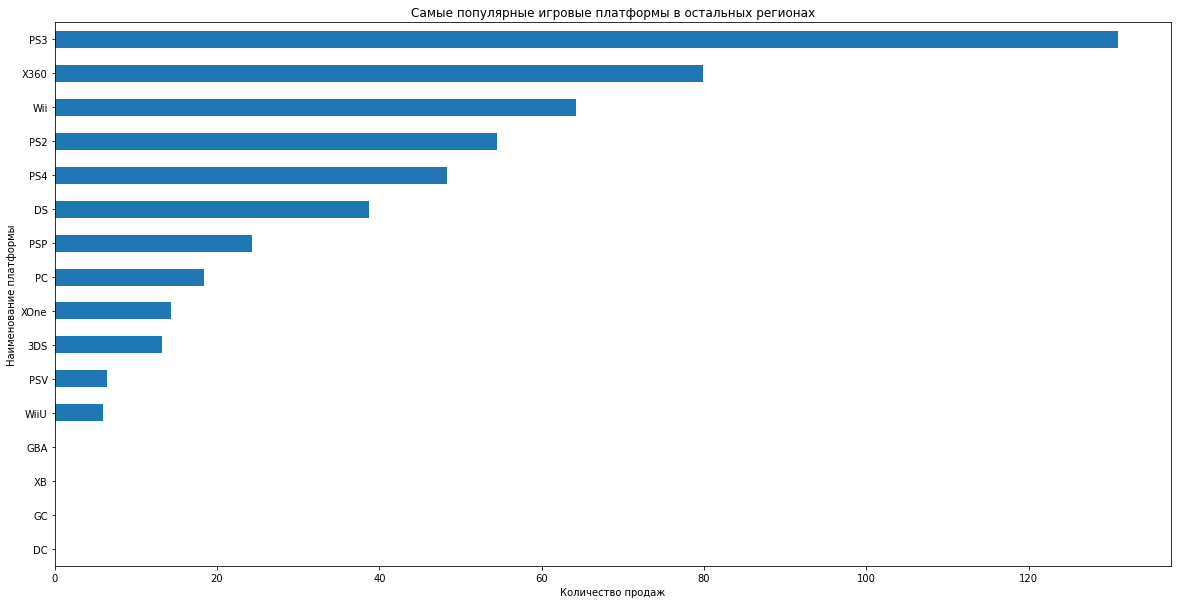

In [ ]:
forecast_period.pivot_table(index = 'platform',
                            values = 'other_sales', aggfunc = 'sum').sort_values(ascending=True,
                                                                              by = 'other_sales').plot(kind = 'barh',
                                                                                                    figsize=(20,10),
                                                                                                    legend = False)
plt.title('Самые популярные игровые платформы в остальных регионах')
plt.ylabel('Наименование платформы')
plt.xlabel('Количество продаж')

Лидеры продаж несколько отличаются от трёх предыдущих регионов. Абсолютные лидер - PS3, кроме того, в пятёрке старая-добрая PS2. Возможно, это говорит о том, что остальные регионы не спешат покупать новые приставки сразу после релиза. Возможно, финансовая составляющая здесь играет - нежелание тратить несколько сотен долларов на новую консоль или это искренние фанаты данных платформ.

##### Самые популярные жанры игр по регионам

Действуем точно так же. Последовательно пройдёмся по всем регионам.

Начинаем так же с Северной Америки.

Text(0.5, 1.0, 'Самые популярные жанры игр в Северной Америке')

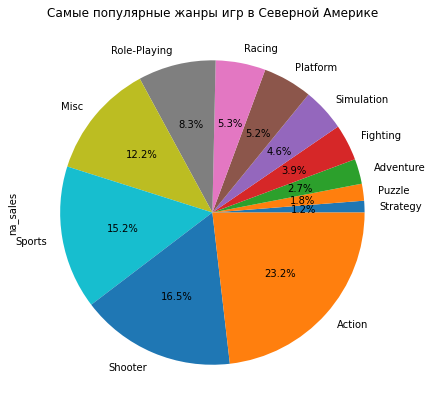

In [ ]:
forecast_period.pivot_table(index = 'genre',
                            values = 'na_sales', aggfunc = 'sum').sort_values(ascending=True,
                                                                              by = 'na_sales').plot(kind='pie',
                                                                                                    autopct = '%1.1f%%',
                                                                                                    figsize=(7,7),
                                                                                                    y= 'na_sales', legend=False)
plt.title('Самые популярные жанры игр в Северной Америке')


Боевик, Шутер, Спортивные игры, многопользовательские шутеры и РПГ - такова первая пятёрка для Северной Америки.
Посмотрим, что в Европе.

Text(0.5, 1.0, 'Самые популярные жанры игр в Европе')

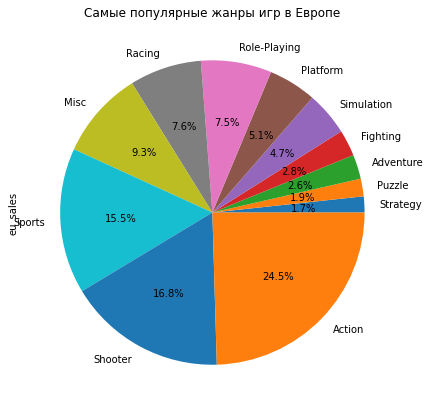

In [ ]:
forecast_period.pivot_table(index = 'genre',
                            values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=True,
                                                                              by = 'eu_sales').plot(kind='pie',
                                                                                                    autopct = '%1.1f%%',
                                                                                                    figsize=(7,7),
                                                                                                    y= 'eu_sales', legend=False)
plt.title('Самые популярные жанры игр в Европе')

Практически то же самое, единственное, что пятое место здесь заняли гонки, а не РПГ. Теперь Япония.

Text(0.5, 1.0, 'Самые популярные жанры игр в Японии')

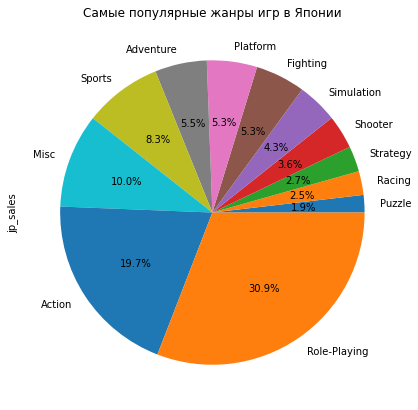

In [ ]:
forecast_period.pivot_table(index = 'genre',
                            values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=True,
                                                                              by = 'jp_sales').plot(kind='pie',
                                                                                                    autopct = '%1.1f%%',
                                                                                                    figsize=(7,7),
                                                                                                    y= 'jp_sales', legend=False)
plt.title('Самые популярные жанры игр в Японии')

А вот здесь пятёрка другая. РПГ, Боевик, Многопользовательский шутер, Спорт и Приключения. Сказывается тот факт, что в Японии предпочитают портативные консоли.

Взглянем для статистики на остальной мир.

Text(0.5, 1.0, 'Самые популярные жанры игр в остальных регионах')

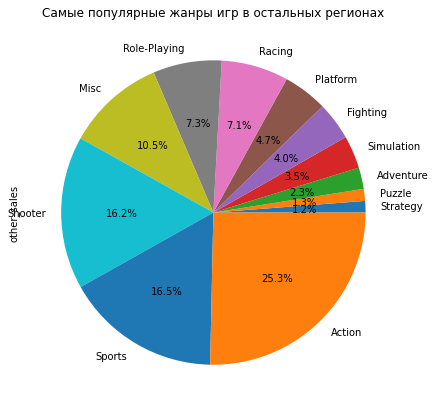

In [ ]:
forecast_period.pivot_table(index = 'genre',
                            values = 'other_sales', aggfunc = 'sum').sort_values(ascending=True,
                                                                              by = 'other_sales').plot(kind='pie',
                                                                                                    autopct = '%1.1f%%',
                                                                                                    figsize=(7,7),
                                                                                                    y= 'other_sales', legend=False)
plt.title('Самые популярные жанры игр в остальных регионах')

Та же пятёрка, что в Северной Америке.

##### Влияние рейтинга ESRB на продажи в отдельном регионе

Построю таблицу со значениями рейтинга и соответствующими продажами по разным регионам.

In [ ]:
esrb_rating = forecast_period.pivot_table(index = 'rating', values = ['na_sales','eu_sales',
                                                                      'jp_sales', 'other_sales'], aggfunc = 'sum')
esrb_rating

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,393.08,95.06,663.99,138.48
E10+,162.75,31.91,287.61,61.97
EC,0.00,0.00,1.32,0.08
M,385.86,41.09,546.55,134.30
RP,0.03,0.00,0.00,0.01
T,217.89,74.74,371.32,94.12


Ну что же, зависимость есть. Видно, что, например игры рейтинга EC (early childhood) покупаются только в Северной Америке (по крайней мере, в моей выборке). Для всех регионов одинаково популярна категория "Для всех" (Е).

**Выводы по блоку 4** Получены портреты пользователей по регионам:
1. Для пользователя из Северной Америки характерны следующие предпочтения:
- Приставки в порядке убывания рейтинга: X360, Wii, PS3, DS, PS4 (лидер - отечественный производитель);
- Игровые жанры - Боевики, Шутеры (в т.ч многопользовательские), Спорт и РПГ;
- Некоторое число пользователей покупают игры для малышей.
2. Для пользователей из Европы характерны следующие предпочтения:
- Приставки в порядке убывания рейтинга: PS3, X360, Wii, PS4, DS (популярны и японские и американские производители);
- Игровые жанры - Боевики, Шутеры (в т.ч многопользовательские), Спорт и Гонки;
- Есть любители новых игр, рейтинг по которым ещё не получен.
3. Для пользователей из Японии характерны следующие предпочтения:
- Приставки в порядке убывания рейтинга: DS, 3DS, PS3, PSP, Wii (первая пятёрка - исключительно отечественный производитель);
- Игровые жанры - РПГ, Боевик, Многопользовательские шутеры, Спорт и Приключения;
- Из трёх основных регионов продаж в Японии более популярны игры 13+ (T), чем игры 18+ (M).

#### Проверка гипотез

Мне предстоит проверить две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

##### Сравнение средних пользовательских рейтингов платформ Xone и PC

Создаю два файла по заданным в заголовке условиям.

In [ ]:
x_one_score = forecast_period[(forecast_period['platform'] == 'XOne') &  (forecast_period['user_score'] > 0)]['user_score']
pc_score = forecast_period[(forecast_period['platform'] == 'PC') &  (forecast_period['user_score'] > 0)]['user_score']

А теперь, по составленным для удобства файлам и проверю гипотезы:
- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xone и PC - одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xone и PC - разные.
Применяю метод ttest_ind()

<AxesSubplot:>

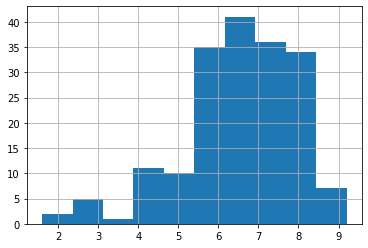

In [ ]:
x_one_score.hist()

<AxesSubplot:>

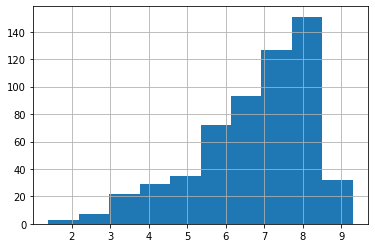

In [ ]:
pc_score.hist()

In [ ]:
alpha = .05

results = st.ttest_ind(x_one_score, pc_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.04401892858926167
Отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>Комментарий студента: 1
</b> Убрал скобки. </div

Для проверки выведу средние значения рейтингов.

In [ ]:
print (x_one_score.mean())
print (pc_score.mean())

6.521428571428572
6.765499124343258


Всё верно, нулевая гипотеза не подтверждается. Рейтинги пользователей Xone и PC не равны.

##### Сравнение средних пользовательских рейтингов жанров Action и Sports

Действую аналогично предыдущему пункту образом. Создаю два файла с рейтингами.

In [ ]:
action_score = forecast_period[(forecast_period['genre'] == 'Action') &  (forecast_period['user_score'] > 0)]['user_score']
sports_score = forecast_period[(forecast_period['genre'] == 'Sports') &  (forecast_period['user_score'] > 0)]['user_score']

Проверяю гипотезы:
- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports - одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports - разные.

In [ ]:
alpha = .05

results = st.ttest_ind(action_score, sports_score, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.540665510055229e-11
Отвергаем нулевую гипотезу


Для проверки выведу средние значения рейтингов.

In [ ]:
print (action_score.mean())
print (sports_score.mean())

6.836079077429983
6.307979626485569


Всё верно, нулевая гипотеза не подтверждается. Пользовательские рейтинги жанров Экшн и Спортс не равны.

#### Вывод

В результате проведённого анализа получены следующие результаты:
- За рассматриваемый период 1980 - 2016 наиболее яркий промежуток времени для производителей игр для различных платформ 2006 - 2011. В этот промежуток времени выпускалось ежегодно более 1000 игр.
- Самой популярной игровой платформой по количеству проданных игр является PS2.
- Лучшими перспективами продаж на 2017 год обладает приставка PS4 всилу того, что выпущена недавно и её жизненный период (составляющий в среднем 10-11 лет) в начале;
- Рейтинг критиков оказывает большее влияние на продажи, чем рейтинг пользователей.

Переходим к главному вопросу проекта, какие закономерности влияют на успешность игры. Нужно руководствоваться составленными портретами пользователей по регионам.

**Для пользователя из Северной Америки характерны следующие предпочтения:**
- Приставки в порядке убывания рейтинга: X360, Wii, PS3, DS, PS4 (лидер - отечественный производитель);
- Игровые жанры - Боевики, Шутеры (в т.ч многопользовательские), Спорт и РПГ;
- Некоторое число пользователей покупают игры для малышей.

**Для пользователей из Европы характерны следующие предпочтения:**
- Приставки в порядке убывания рейтинга: PS3, X360, Wii, PS4, DS (популярны и японские и американские производители);
- Игровые жанры - Боевики, Шутеры (в т.ч многопользовательские), Спорт и Гонки;
- Есть любители новых игр, рейтинг по которым ещё не получен.

**Для пользователей из Японии характерны следующие предпочтения:**
- Приставки в порядке убывания рейтинга: DS, 3DS, PS3, PSP, Wii (первая пятёрка - исключительно отечественный производитель);
- Игровые жанры - РПГ, Боевик, Многопользовательские шутеры, Спорт и Приключения;
- Из трёх основных регионов продаж в Японии более популярны игры 13+ (T), чем игры 18+ (M).

**Таким образом, на успешность продаж той или иной игры оказывают влияние Регион продажи и Оценка критиков. В большей степени, по моему мнению, нужно ориентироваться на регион и соответствующий портрет пользователя.**